# Import

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs

# Korea(KOSPI)

In [20]:
url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=1'

In [21]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url, headers=headers)

In [22]:
response.text

'<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버 증권</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230704202526/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230704202526/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230704202526/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230704202526/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230704202526/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230704202526/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230704202526/css/world.css">\n</head>\n<body>\n<script t

In [23]:
html = bs(response.text, 'html.parser')
html_table = html.select("table")
table = pd.read_html(str(html_table))
print('파싱된 테이블의 개수 :', len(table))

파싱된 테이블의 개수 : 2


In [24]:
table[0]

,날짜,체결가,전일비,등락률,거래량(천주),거래대금(백만)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.07.07,2526.71,29.58,-1.16%,613265.0,10367353.0
2,2023.07.06,2556.29,22.71,-0.88%,531900.0,10291029.0
3,2023.07.05,2579.00,14.31,-0.55%,601089.0,10257664.0
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,2023.07.04,2593.31,9.16,-0.35%,674411.0,9160796.0
9,2023.07.03,2602.47,38.19,+1.49%,618006.0,8973590.0


In [25]:
table[1]

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [26]:
table[0].dropna()

,날짜,체결가,전일비,등락률,거래량(천주),거래대금(백만)
1,2023.07.07,2526.71,29.58,-1.16%,613265.0,10367353.0
2,2023.07.06,2556.29,22.71,-0.88%,531900.0,10291029.0
3,2023.07.05,2579.00,14.31,-0.55%,601089.0,10257664.0
8,2023.07.04,2593.31,9.16,-0.35%,674411.0,9160796.0
9,2023.07.03,2602.47,38.19,+1.49%,618006.0,8973590.0
10,2023.06.30,2564.28,14.26,+0.56%,510934.0,8209121.0


In [40]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI'  
for page in range(1, 500):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 (99페이지에 대해서 반복)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적.
    df = df.append(table[0].dropna())

https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=1
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=2
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=3
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=4


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=5
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=6
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=7
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=8


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=9
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=10
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=11
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=12


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=13
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=14
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=15
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=16


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=17
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=18
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=19
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=20


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=21
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=22
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=23
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=24


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=25
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=26
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=27
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=28


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=29
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=30
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=31
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=32


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=33
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=34
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=35
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=36


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=37
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=38
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=39
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=40


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=41
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=42
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=43
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=44


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=45
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=46
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=47
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=48


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=49
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=50
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=51
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=52


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=53
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=54
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=55
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=56


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=57
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=58
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=59
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=60


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=61
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=62
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=63
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=64


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=65
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=66
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=67
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=68


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=69
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=70
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=71
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=72


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=73
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=74
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=75
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=76


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=77
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=78
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=79
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=80


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=81
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=82
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=83
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=84


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=85
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=86
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=87
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=88


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=89
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=90
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=91


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.a

https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=92
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=93
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=94
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=95


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=96
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=97
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=98
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=99


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=100
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=101
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=102
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=103


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=104
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=105
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=106
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=107


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=108
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=109
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=110
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=111


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=112
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=113
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=114
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=115


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=116
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=117
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=118
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=119


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=120
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=121
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=122
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=123


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=124
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=125
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=126
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=127


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=128
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=129
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=130
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=131


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=132
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=133
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=134
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=135


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=136
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=137
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=138
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=139


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=140
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=141
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=142
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=143


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=144
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=145
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=146
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=147


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=148
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=149
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=150
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=151


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=152
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=153
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=154
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=155


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=156
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=157
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=158
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=159


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=160
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=161
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=162
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=163


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=164
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=165
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=166
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=167


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=168
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=169
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=170
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=171


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=172
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=173
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=174
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=175


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=176
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=177
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=178
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=179


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=180
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=181
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=182
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=183


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=184
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=185
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=186
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=187


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=188
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=189
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=190
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=191


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=192
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=193
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=194
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=195


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=196
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=197
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=198
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=199


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=200
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=201
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=202
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=203


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=204
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=205
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=206
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=207


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=208
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=209
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=210
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=211


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=212
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=213
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=214
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=215


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=216
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=217
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=218
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=219


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=220
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=221
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=222
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=223


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=224
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=225
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=226
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=227


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=228
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=229
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=230
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=231


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=232
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=233
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=234
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=235


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=236
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=237
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=238
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=239


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=240
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=241
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=242
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=243


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=244
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=245
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=246
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=247


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=248
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=249
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=250
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=251


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=252
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=253
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=254
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=255


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=256
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=257
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=258
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=259


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=260
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=261
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=262
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=263


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=264
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=265
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=266
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=267


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=268
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=269
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=270
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=271


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=272
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=273
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=274
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=275


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=276
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=277
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=278
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=279


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=280
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=281
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=282
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=283


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=284
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=285
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=286
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=287


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=288
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=289
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=290
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=291


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=292
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=293
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=294
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=295


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=296
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=297
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=298
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=299


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=300
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=301
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=302
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=303


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=304
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=305
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=306
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=307


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=308
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=309
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=310
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=311


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=312
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=313
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=314
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=315


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=316
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=317
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=318
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=319


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=320
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=321
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=322
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=323


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=324
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=325
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=326
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=327


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=328
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=329
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=330
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=331


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=332
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=333
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=334
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=335


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=336
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=337
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=338
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=339


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=340
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=341
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=342
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=343


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=344
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=345


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=346
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=347
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=348
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=349


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=350
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=351
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=352
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=353


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=354
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=355
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=356
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=357


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=358
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=359
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=360
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=361


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=362
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=363
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=364
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=365


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=366
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=367
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=368
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=369


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=370
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=371
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=372
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=373


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=374
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=375
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=376
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=377


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=378
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=379
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=380
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=381


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=382
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=383
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=384
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=385


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=386
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=387
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=388
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=389


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=390
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=391
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=392
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=393


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=394
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=395
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=396
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=397


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=398
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=399
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=400
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=401


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=402
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=403
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=404
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=405


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=406
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=407
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=408
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=409


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=410
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=411
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=412
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=413


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=414
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=415
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=416
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=417


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=418
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=419
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=420
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=421


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=422
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=423
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=424
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=425


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=426
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=427
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=428


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=429
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=430
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=431
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=432


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=433
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=434
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=435
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=436


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=437
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=438
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=439
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=440


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=441
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=442
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=443
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=444


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=445
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=446
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=447
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=448


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=449
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=450
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=451
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=452


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=453
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=454
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=455
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=456


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=457
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=458
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=459
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=460


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=461
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=462
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=463
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=464


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=465
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=466
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=467
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=468


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=469
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=470
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=471
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=472


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=473
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=474
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=475
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=476


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=477
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=478
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=479
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=480


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=481
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=482
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=483
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=484


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=485
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=486
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=487
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=488


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=489
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=490
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=491
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=492


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=493
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=494
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=495
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=496
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=497
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=498
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=499


<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


In [41]:
df

,날짜,체결가,전일비,등락률,거래량(천주),거래대금(백만)
1,2023.07.07,2526.71,29.58,-1.16%,613265.0,10367353.0
2,2023.07.06,2556.29,22.71,-0.88%,531900.0,10291029.0
3,2023.07.05,2579.00,14.31,-0.55%,601089.0,10257664.0
8,2023.07.04,2593.31,9.16,-0.35%,674411.0,9160796.0
9,2023.07.03,2602.47,38.19,+1.49%,618006.0,8973590.0
...,...,...,...,...,...,...
2,2011.05.24,2061.76,6.05,+0.29%,261949.0,6012138.0
3,2011.05.23,2055.71,55.79,-2.64%,289835.0,6239214.0
8,2011.05.20,2111.50,15.99,+0.76%,280007.0,6096860.0
9,2011.05.19,2095.51,40.27,-1.89%,278726.0,7779617.0


In [42]:
df = df.dropna()
# df = df.iloc[0:30] 
df = df.sort_values(by='날짜')
df

,날짜,체결가,전일비,등락률,거래량(천주),거래대금(백만)
10,2011.05.18,2135.78,33.37,+1.59%,255798.0,7102533.0
9,2011.05.19,2095.51,40.27,-1.89%,278726.0,7779617.0
8,2011.05.20,2111.50,15.99,+0.76%,280007.0,6096860.0
3,2011.05.23,2055.71,55.79,-2.64%,289835.0,6239214.0
2,2011.05.24,2061.76,6.05,+0.29%,261949.0,6012138.0
...,...,...,...,...,...,...
9,2023.07.03,2602.47,38.19,+1.49%,618006.0,8973590.0
8,2023.07.04,2593.31,9.16,-0.35%,674411.0,9160796.0
3,2023.07.05,2579.00,14.31,-0.55%,601089.0,10257664.0
2,2023.07.06,2556.29,22.71,-0.88%,531900.0,10291029.0


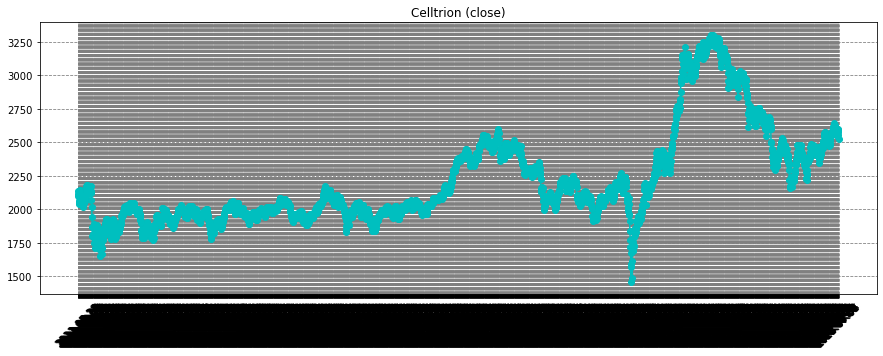

In [43]:
plt.figure(figsize=(15, 5)) 
plt.title('Celltrion (close)')
plt.xticks(rotation=45) 
plt.plot(df['날짜'], df['체결가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

In [44]:
df.to_csv('korea_kospi.csv')

# US(NASDAQ)

In [49]:
url = 'https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=1'

In [50]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url, headers=headers)

In [51]:
response.text

'<script language=javascript>\nvar nsc="finance.world";\nfunction select_chart(pst)\n{\n\tfor(var i=0 ; i<4 ; i++)\n\t{\n\t\tif (i == pst)\n\t\t\tdocument.getElementById(\'chart_\'+pst).className = \'on\';\n\t\telse\n\t\t\tdocument.getElementById(\'chart_\'+i).className = "";\n\t}\n}\n</script>\n\n<!--  global include -->\n\n\t\n\t\n\t\n\t\n\t\n\t\n<html lang=\'ko\'>\n<head>\n\n\n\t\n\t\n\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t<title>나스닥 종합 : 네이버 증권</title>\n\t\t\t\n\t\t\n\t\n\n\n\n\n\n\t\n\t\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\n\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n<meta name="apple-mobile-web-app-title" content="네이버 증권" />\n\n\n\n\n\n\t\n    \n        <meta property="og:url" content="http://finance.naver.com/world/sise.naver?symbol=NAS@IXIC"/>\n        \n\t\t\t\n\t\t    \n\t\t    \t<meta property="og:title" content="나스닥 종합 : 네이버 증권"/>\n\t\t     \n\t\t\n\t\t\n\t

In [52]:
html = bs(response.text, 'html.parser')
html_table = html.select("table")
table = pd.read_html(str(html_table))
print('파싱된 테이블의 개수 :', len(table))

파싱된 테이블의 개수 : 3


In [53]:
table[0]

,0,1,2
0,"전일 13,679.04","고가 13,730.72","52주 최고 13,864.06"
1,"시가 13,668.07","저가 13,657.72","52주 최저 10,088.83"


In [54]:
table[1]

,일자,종가,전일대비,시가,고가,저가
0,2023.07.07,13681.61,2.57,13668.07,13730.72,13657.72
1,2023.07.06,13679.04,112.61,13653.17,13689.52,13567.26
2,2023.07.05,13791.65,25.12,13772.10,13844.50,13764.25
3,2023.07.03,13816.77,28.85,13798.70,13839.09,13773.41
4,2023.06.30,13787.92,196.59,13719.98,13816.68,13716.16
5,2023.06.29,13591.33,0.42,13592.36,13618.53,13540.26
6,2023.06.28,13591.75,36.08,13506.02,13654.14,13495.73
7,2023.06.27,13555.67,219.89,13389.25,13578.80,13366.97
8,2023.06.26,13335.78,156.74,13468.75,13573.57,13334.42
9,2023.06.23,13492.52,138.09,13484.10,13572.19,13442.65


In [55]:
table[2]

,업체명,거래량,전일비


In [56]:
table[1].dropna()

,일자,종가,전일대비,시가,고가,저가
0,2023.07.07,13681.61,2.57,13668.07,13730.72,13657.72
1,2023.07.06,13679.04,112.61,13653.17,13689.52,13567.26
2,2023.07.05,13791.65,25.12,13772.10,13844.50,13764.25
3,2023.07.03,13816.77,28.85,13798.70,13839.09,13773.41
4,2023.06.30,13787.92,196.59,13719.98,13816.68,13716.16
5,2023.06.29,13591.33,0.42,13592.36,13618.53,13540.26
6,2023.06.28,13591.75,36.08,13506.02,13654.14,13495.73
7,2023.06.27,13555.67,219.89,13389.25,13578.80,13366.97
8,2023.06.26,13335.78,156.74,13468.75,13573.57,13334.42
9,2023.06.23,13492.52,138.09,13484.10,13572.19,13442.65


In [61]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#'  
for page in range(1, 500):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 (99페이지에 대해서 반복)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적.
    df = df.append(table[1].dropna())

https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=1
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=2


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=3
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=4


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=5
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=6


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=7
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=8


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=9
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=10


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=11
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=12


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=13
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=14


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=15
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=16


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=17
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=18


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=19
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=20


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=21
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=22


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=23


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=24


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=25
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=26


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=27
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=28


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=29
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=30


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=31


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=32
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=33


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=34
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=35


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=36
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=37


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=38
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=39


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=40
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=41


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=42
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=43


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=44
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=45


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=46
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=47


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=48
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=49


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=50
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=51


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=52
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=53


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=54
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=55


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=56
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=57


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=58
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=59


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=60
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=61


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=62
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=63


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=64
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=65


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=66
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=67


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=68
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=69


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=70
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=71


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=72
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=73


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=74
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=75


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=76
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=77


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=78
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=79


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=80
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=81


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=82
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=83


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=84
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=85


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=86
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=87


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=88
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=89


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=90
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=91


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=92
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=93


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=94
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=95


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=96
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=97


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=98
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=99


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=100
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=101


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=102
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=103


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=104
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=105


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=106
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=107


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=108
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=109


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=110
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=111


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=112
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=113


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=114
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=115


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=116


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=117
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=118


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=119
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=120


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=121
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=122


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=123
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=124


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=125
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=126


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=127
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=128


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=129
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=130


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=131
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=132


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=133
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=134


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=135
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=136


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=137
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=138


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=139
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=140


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=141
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=142


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=143
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=144


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=145
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=146


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=147
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=148


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=149
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=150


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=151
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=152
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=153


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=154
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=155


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=156
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=157


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=158
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=159


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=160
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=161


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=162
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=163


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=164
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=165
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=166


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=167
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=168


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=169
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=170


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=171
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=172


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=173
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=174


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=175
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=176


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=177


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=178


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=179
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=180


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=181
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=182


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=183
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=184


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=185


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=186
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=187


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=188


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=189
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=190


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=191
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=192


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=193
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=194


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=195
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=196


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=197
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=198


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=199
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=200


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=201
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=202


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=203
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=204


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=205
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=206


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=207


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=208
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=209


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=210
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=211


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=212
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=213


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=214
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=215


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=216
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=217


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=218
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=219


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=220
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=221


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=222


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=223
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=224


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=225
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=226


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=227
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=228


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=229
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=230


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=231
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=232


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=233
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=234


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=235
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=236


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=237
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=238


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=239


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=240
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=241


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=242
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=243


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=244
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=245


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=246
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=247


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=248
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=249


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=250
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=251


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=252
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=253


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=254
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=255


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=256
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=257


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=258
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=259


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=260
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=261


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=262
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=263


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=264
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=265


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=266
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=267


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=268
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=269


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=270


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=271
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=272


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=273
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=274


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=275
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=276


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=277
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=278


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=279
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=280


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=281
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=282


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=283
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=284


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=285
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=286


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=287


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=288
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=289


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=290
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=291


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=292
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=293


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=294
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=295


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=296
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=297


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=298
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=299


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=300


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=301
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=302


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=303


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=304
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=305


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=306
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=307


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=308
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=309


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=310
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=311


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=312
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=313


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=314


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=315
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=316


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=317
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=318


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=319
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=320


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=321
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=322


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=323
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=324


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=325
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=326


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=327
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=328


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=329
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=330


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=331
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=332


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=333
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=334


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=335
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=336


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=337
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=338


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=339
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=340


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=341
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=342


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=343
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=344


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=345
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=346


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=347
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=348


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=349
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=350


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=351
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=352


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=353
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=354


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=355
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=356


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=357
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=358


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=359
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=360


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=361


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=362
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=363


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=364
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=365


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=366
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=367


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=368
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=369


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=370
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=371


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=372


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=373
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=374


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=375
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=376


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=377
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=378


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=379
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=380


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=381
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=382


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=383
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=384


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=385
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=386


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=387
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=388


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=389
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=390


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=391
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=392


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=393


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=394
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=395


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=396
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=397


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=398
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=399


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=400
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=401


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=402
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=403


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=404
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=405


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=406
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=407


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=408
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=409


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=410
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=411


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=412
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=413


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=414
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=415


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=416
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=417


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=418
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=419


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=420
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=421


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=422
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=423


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=424


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=425
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=426


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=427
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=428


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=429
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=430


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=431
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=432


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=433
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=434


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=435
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=436


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=437
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=438


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=439
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=440


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=441
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=442


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=443
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=444


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=445
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=446


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=447
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=448


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=449
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=450


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=451
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=452


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=453
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=454


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=455
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=456


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=457
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=458


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=459
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=460


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=461
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=462


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=463


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=464
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=465


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=466
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=467


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=468
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=469


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=470
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=471


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=472
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=473


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=474
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=475


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=476
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=477


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=478
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=479


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=480
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=481


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=482
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=483


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=484
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=485


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=486


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=487
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=488


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=489
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=490


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=491
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=492


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=493
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=494


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=495
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=496


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=497
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=498
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=499


<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())


In [67]:
df

,일자,종가,전일대비,시가,고가,저가
9,2023.06.23,13492.52,138.09,13484.1,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.1,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.1,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.1,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.1,13572.19,13442.65
...,...,...,...,...,...,...
9,2023.06.23,13492.52,138.09,13484.1,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.1,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.1,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.1,13572.19,13442.65


In [65]:
df = df.dropna()
# df = df.iloc[0:30] 
df = df.sort_values(by='일자')
df

,일자,종가,전일대비,시가,고가,저가
9,2023.06.23,13492.52,138.09,13484.10,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.10,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.10,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.10,13572.19,13442.65
9,2023.06.23,13492.52,138.09,13484.10,13572.19,13442.65
...,...,...,...,...,...,...
0,2023.07.07,13683.99,4.95,13668.07,13730.72,13657.72
0,2023.07.07,13687.15,8.11,13668.07,13730.72,13657.72
0,2023.07.07,13683.99,4.95,13668.07,13730.72,13657.72
0,2023.07.07,13687.06,8.02,13668.07,13730.72,13657.72


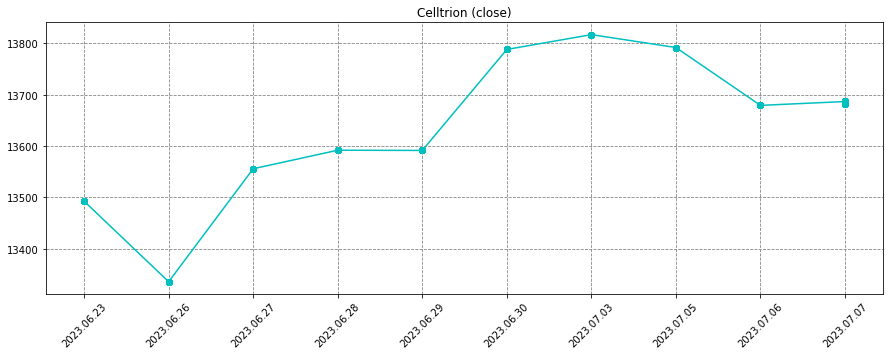

In [66]:
plt.figure(figsize=(15, 5)) 
plt.title('Celltrion (close)')
plt.xticks(rotation=45) 
plt.plot(df['일자'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()